In [2]:
import tensorflow as tf
import os

In [9]:
train_happy_dir= os.path.join('C:/Navneet/jupyter/tmp/happy-or-sad/happy')

train_sad_dir = os.path.join(os.getcwd(),'C:/Navneet/jupyter/tmp/happy-or-sad/sad')

In [10]:
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

['.ipynb_checkpoints', 'happy1-00.png', 'happy1-01.png', 'happy1-02.png', 'happy1-03.png', 'happy1-04.png', 'happy1-05.png', 'happy1-06.png', 'happy1-07.png', 'happy1-08.png']
['sad1-00.png', 'sad1-01.png', 'sad1-02.png', 'sad1-03.png', 'sad1-04.png', 'sad1-05.png', 'sad1-06.png', 'sad1-07.png', 'sad1-08.png', 'sad1-09.png']


In [11]:
print('total training happy images: ',len(train_happy_names))
print('total training sad images: ', len(train_sad_names))
      

total training happy images:  41
total training sad images:  40


In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows=4
ncols=4

pic_index=0

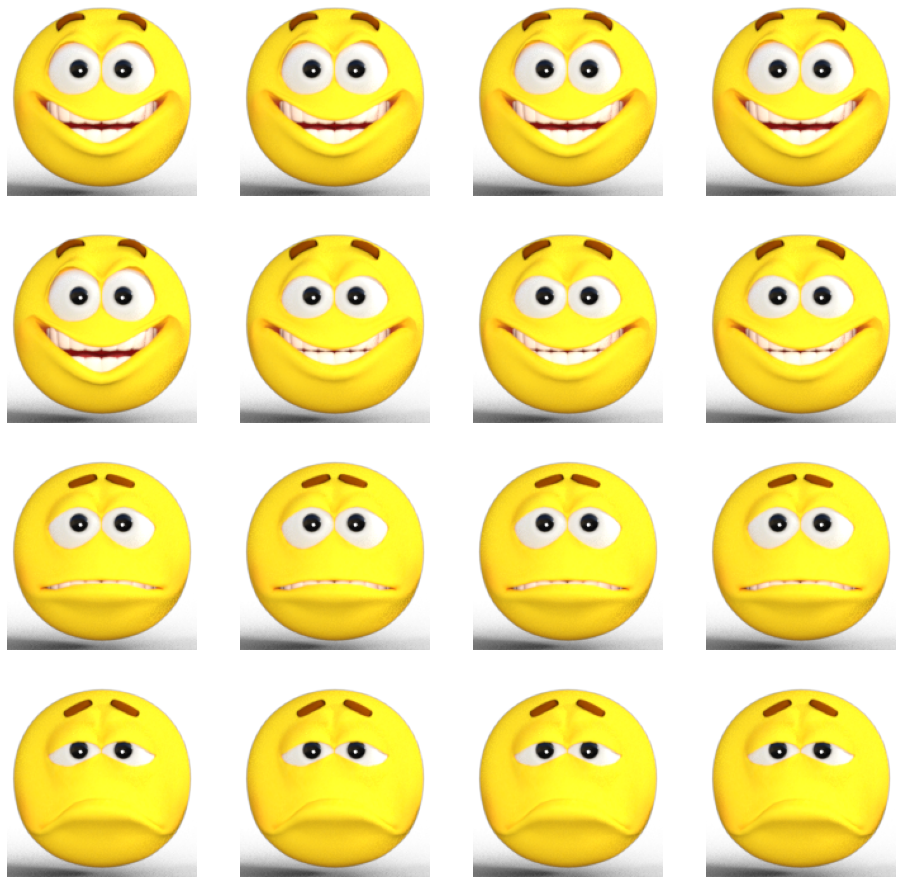

In [15]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [18]:
import PIL
from PIL import Image

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/225)

train_generator = train_datagen.flow_from_directory('C:/Navneet/jupyter/tmp/happy-or-sad/',
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 81 images belonging to 2 classes.


In [25]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.999):
            print('\nReached 99.9% accuracy. Cancelling training!\n')
            self.model.stop_training = True

In [26]:
callbacks = myCallback()

In [30]:
model.fit(train_generator,
         epochs=25,
         verbose=1,
         callbacks=[callbacks])

Epoch 1/25
5/5 [==============================] - 1s 219ms/step - loss: 0.5577 - accuracy: 0.8519
Epoch 2/25
5/5 [==============================] - 1s 286ms/step - loss: 0.6392 - accuracy: 0.8642
Epoch 3/25
5/5 [==============================] - 1s 220ms/step - loss: 0.4607 - accuracy: 0.8395
Epoch 4/25
5/5 [==============================] - 1s 271ms/step - loss: 0.1905 - accuracy: 0.9383
Epoch 5/25
5/5 [==============================] - 1s 266ms/step - loss: 0.1918 - accuracy: 0.9136
Epoch 6/25
5/5 [==============================] - 1s 224ms/step - loss: 0.1999 - accuracy: 0.9259
Epoch 7/25
5/5 [==============================] - 1s 216ms/step - loss: 0.1186 - accuracy: 0.9630
Epoch 8/25
5/5 [==============================] - 1s 222ms/step - loss: 0.1539 - accuracy: 0.9383
Epoch 9/25
5/5 [==============================] - 1s 220ms/step - loss: 0.0912 - accuracy: 0.9877
Epoch 10/25
5/5 [==============================] - 1s 216ms/step - loss: 0.3414 - accuracy: 0.9136
Epoch 11/25
5/5 [==